In [8]:
import numpy as np
import matplotlib.pyplot as plt

# **Copmaring Approx vs Naive**

### **Naive KNN**

In [9]:
# Naive KNN
def naive_knn_indices(query_point, X_train, k):
    distances = np.linalg.norm(X_train - query_point, axis=1)  # Euclidean distances
    nearest_indices = np.argsort(distances)[:k]  # Indices of k nearest neighbors
    return nearest_indices

### **LSH**

In [10]:
# Hyper Plane Generator
def random_hyper_plane(d: int):
    w = 2*np.random.rand(d) - 1
    b = 2*np.random.rand() - 1
    return w, b

# Vectorie Data
def vectorize(test_data, p, N, D):
    X = np.hstack((test_data, np.ones((N, 1)))) # Augmented Matrix 
    W = np.zeros((D+1, p))
    for i in range(p):
        w, b = random_hyper_plane(D)
        W[:, i] = np.concatenate((w, [b]), axis=0)
    return X, W

# Hash Function
def Hash(X, W):
    return np.sign(X@W)  # Size N x p

# Predict Points
def predict_LSH_indices(X, H, W, query_pt, k):
    h = Hash(np.hstack([query_pt, np.ones(1)]), W) # Size 1 x p
    bucket_idx = np.where(np.all(H == h, axis=1))[0]
    if len(bucket_idx) == 0:
        return []
    bucket_pts = X[bucket_idx]
    distances = np.linalg.norm(bucket_pts - query_pt, axis=1)
    k_nearest_indices = np.argsort(distances)[:k]
    return bucket_idx[k_nearest_indices]


### **KD Tree**

In [11]:
# Train KD Trees
def KDTree_Train(X_train):
    m=np.median(X_train, axis = 0)
    d1=[]
    d2=[]
    for n in X_train:
        if n[0]<m[0]:
            d1.append(n)

        else:
            d2.append(n)

    m1 = np.median(d1, axis =0)
    m2 = np.median(d2, axis =0)

    d11=[]
    d21=[]
    for n1 in d1:
        if n1[1]<m1[1]:
            d11.append(n1)

        else:
            d21.append(n1)

    d11=(np.array(d11))
    d21=(np.array(d21))

    d12=[]
    d22=[]
    for n2 in d2:
        if n2[1]<m2[1]:
            d12.append(n2)
        else:
            d22.append(n2)

    d12=(np.array(d12))
    d22=(np.array(d22))
    D=[]
    D.append(([d11,d21]))
    D.append(([d12,d22]))
    return m[0] , [m1[1], m2[1]], D


# Predict KD Tree
def KDTree_Predict(quert_pt, k, m0, m1, m2, D, X):
    ind = []
    if (query_pt[0]<m0):
        if query_pt[1]<m1:
            data=(D[0][0])
        else:
            data=(D[0][1])
    else:
        if query_pt[1]<m2:
            data=(D[1][0])
        else:
            data=(D[1][1])
            
    for items in data:
        ind.append(np.where(X == items)[0][0])

    points = X[ind]
    distances = np.linalg.norm(points- query_pt, axis=1)  # Euclidean distances
    nearest_indices = np.argsort(distances)[:k]  # Indices of k nearest neighbors
    ind = np.array(ind)
    return ind[nearest_indices]

### **Comparision between 3**

In [12]:
# Generatng Dataset
N = 300
p = 3 # Hyperplanes
D = 2
k= 11
query_pt = [0, 0.1]

X = np.random.rand(N, D)*6 - 3


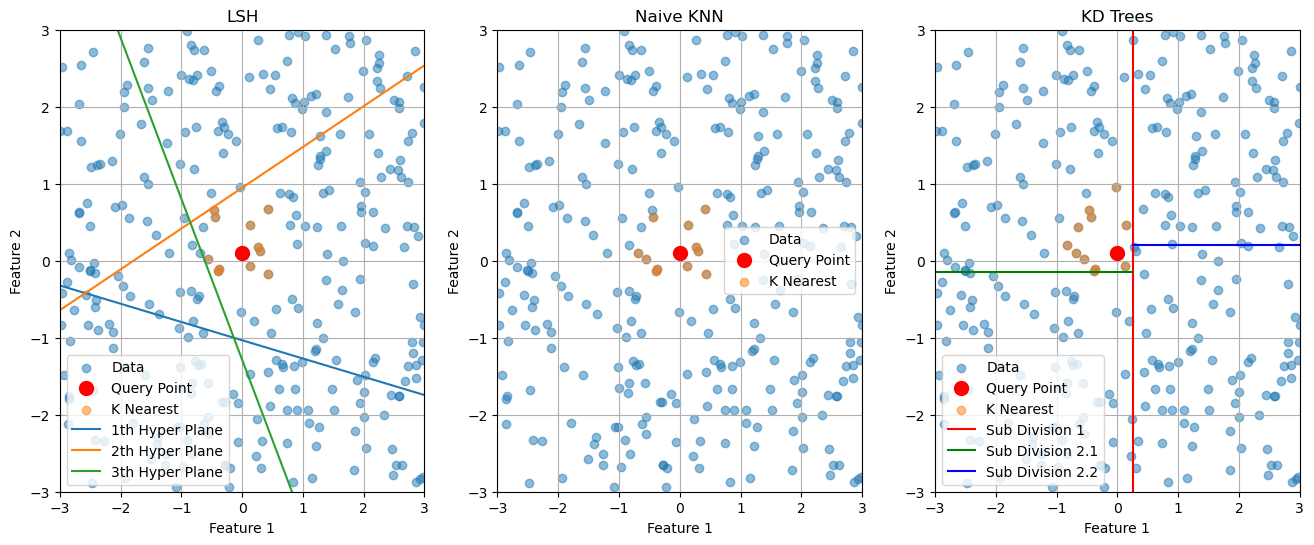

In [13]:
# Matrix Formation
X_aug, W = vectorize(X, p, N, D)
H = Hash(X_aug, W)
ans = KDTree_Train(X)

y_pred_lsh = predict_LSH_indices(X, H, W, query_pt, k)
y_pred_naive = naive_knn_indices(query_pt, X, k)
y_pred_kdtree = KDTree_Predict(query_pt, k, ans[0], ans[1][0], ans[1][1], ans[2], X)
# plot X based on y 
plt.figure(figsize=(16, 6))

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], label=f'Data', alpha = 0.5)
plt.plot(query_pt[0], query_pt[1], 'o', color = 'r',markersize=10, label='Query Point')
points_lsh = X[y_pred_lsh]
plt.scatter(points_lsh[:, 0], points_lsh[:, 1], label=f'K Nearest', alpha = 0.5)
X_line = np.linspace(-3, 3, 100)
for i in range(p):
    y_line = - (W[0, i] * X_line + W[2, i]) / W[1, i]
    plt.plot(X_line, y_line, label=f'{i+1}th Hyper Plane'.format(i))
plt.title('LSH')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()
plt.grid(True)


plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], label=f'Data', alpha = 0.5)
plt.plot(query_pt[0], query_pt[1], 'o', color = 'r',markersize=10, label='Query Point')
points_naive = X[y_pred_naive]
plt.scatter(points_naive[:, 0], points_naive[:, 1], label=f'K Nearest', alpha = 0.5)
plt.title('Naive KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()
plt.grid(True)


# KD TREE
plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], label=f'Data', alpha = 0.5)
plt.plot(query_pt[0], query_pt[1], 'o', color = 'r',markersize=10, label='Query Point')

points_kd = X[y_pred_kdtree]
plt.scatter(points_kd[:, 0], points_kd[:, 1], label=f'K Nearest', alpha = 0.5)

plt.axvline(x=ans[0], color='r', linestyle='-', label = 'Sub Division 1')

x_line = np.linspace(-3, ans[0], 100)
x_line_2 = np.linspace(ans[0], 3, 100)
y1 = [ans[1][0]] * 100  # corresponding y values for x < m
y2 = [ans[1][1]] * 100  # corresponding y values for x > m
plt.plot(x_line, y1,color='g', label='Sub Division 2.1')
plt.plot(x_line_2, y2, color='b', label='Sub Division 2.2')

plt.title('KD Trees')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()
plt.grid(True)
plt.show()